# **1. Setup and Dependencies**

In [8]:
%%capture
!pip install -q --upgrade diffusers transformers scipy
!pip uninstall googletrans -y
!pip install googletrans==4.0.0rc1

# **2. Hugging Face Authentication**

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# **3. Importing Required Libraries**

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

import torch
from diffusers import StableDiffusionPipeline

from googletrans import Translator

# **4. Model Setup**

In [ ]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

# **5. Image Generation Function**

In [6]:
def draw(prompt):
    with torch.cuda.amp.autocast(True):
        image = pipe(prompt, guidance_scale=7.5).images[0]

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return

# **6. Translating Text Prompts**

In [ ]:
translator = Translator()
input_text = "یک شرکت تعمیرات سخت افزار + آلبرت انیشتن در حال تعمیر یک لپ تاپ + شرکت پیشرفته در زمینه تعمیرات سخت افزار + ابزارهای بسیار پیشرفته"
input_text = translator.translate(input_text, dest='en')
input_text = input_text.text
print(input_text)

# **7. Running the Image Generation**

A hardware repair company + Albert Einstein repairing a laptop + company name IRST + Advanced Company in Hardware Repair + Highly Advanced Tools


<ipython-input-6-1080290042d8>:2: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(True):


  0%|          | 0/50 [00:00<?, ?it/s]

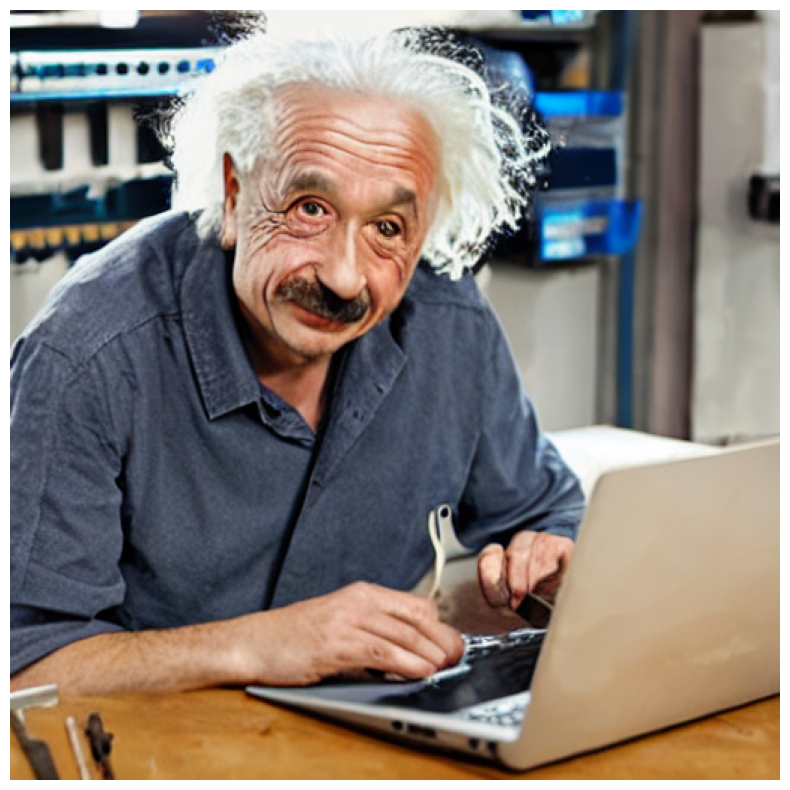

In [18]:
draw(input_text)